##**DS task by Primetrade.ai**


# *Objective*

our objective is to explore the relationship between trader performance and market
sentiment, uncover hidden patterns, and deliver insights that can drive smarter trading
strategies.


We have been given 2 datasets

You are required to work with two main datasets:

1. *Bitcoin Market Sentiment Dataset*

Columns: Date, Classification (Fear/Greed)

Purpose:
This dataset shows how the market feels (fearful or greedy) on different dates — representing the market sentiment of Bitcoin traders and investors.




2. *Historical Trader Data from Hyperliquid*

Columns include:

account – identifies each trader

symbol – asset being traded

execution price – price at which trade happened

size – size of the trade

side – buy/sell direction

time – when the trade occurred

start position, event, closedPnL, leverage, etc.

Purpose:
This dataset captures detailed trading activity and performance of traders over time.

***The goal is to***:

1. Discover how trader behavior or success changes with market sentiment.

2. Find hidden patterns and insights.

3. Suggest data-driven strategies that could help make smarter trading decisions.

In [ ]:
# first let's import our Drive where we have our Datasets stored

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing important libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# importing the Datasets
try:
  hist_dataset= pd.read_csv('/content/drive/MyDrive/historical_data.csv')
  print('History Trader dataset is loaded', hist_dataset.shape)
except Exception as e:
  print('Could not imported the dataset, error:', e)
  hist_dataset= pd.DataFrame()

try:
  bms_dataset= pd.read_csv('/content/drive/MyDrive/fear_greed_index.csv')
  print('History Trader dataset is loaded', bms_dataset.shape)

except Exception as e:
  print('Could not imported the dataset, error:', e)
  bms_dataset= pd.DataFrame()


History Trader dataset is loaded (211224, 16)
History Trader dataset is loaded (2644, 4)


In [ ]:
hist_dataset.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
bms_dataset.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
# lets check some information about the datasets
hist_dataset.info()
bms_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

# **Cleaning**

There are sevral columns with wrong datatypes, First we have to fix this.

In [ ]:
hist_dataset['Timestamp IST'] = pd.to_datetime(hist_dataset['Timestamp IST'], errors='coerce')
hist_dataset['Date'] = hist_dataset['Timestamp IST'].dt.date

In [ ]:
hist_dataset['Timestamp'] = pd.to_datetime(hist_dataset['Timestamp'], unit='ms', errors='coerce')

In [ ]:
num_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL', 'Fee', 'Start Position']
for col in num_cols:
    if col in hist_dataset.columns:
        hist_dataset[col] = pd.to_numeric(hist_dataset[col], errors='coerce')

In [ ]:
bms_dataset['timestamp'] = pd.to_datetime(bms_dataset['timestamp'], errors= 'coerce')
bms_dataset['date']= pd.to_datetime(bms_dataset['date'], errors='coerce')

In [ ]:
hist_dataset.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-02-12


In [ ]:
bms_dataset.head()

,timestamp,value,classification,date
0,1970-01-01 00:00:01.517463000,30,Fear,2018-02-01
1,1970-01-01 00:00:01.517549400,15,Extreme Fear,2018-02-02
2,1970-01-01 00:00:01.517635800,40,Fear,2018-02-03
3,1970-01-01 00:00:01.517722200,24,Extreme Fear,2018-02-04
4,1970-01-01 00:00:01.517808600,11,Extreme Fear,2018-02-05


In [ ]:
# Lets Check for Null Values
hist_dataset.isna().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,131999
Start Position,0
Direction,0
Closed PnL,0


In [ ]:
# wwe are goiing to remove some columns as those columns are of no use in our objective/Goals
hist_dataset.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Date'],
      dtype='object')

In [ ]:
hist_clean= hist_dataset.drop(columns=[ 'Size Tokens','Timestamp IST', 'Direction','Transaction Hash', 'Order ID', 'Crossed', 'Trade ID'])
hist_clean.columns

Index(['Account', 'Coin', 'Execution Price', 'Size USD', 'Side',
       'Start Position', 'Closed PnL', 'Fee', 'Timestamp', 'Date'],
      dtype='object')

In [ ]:
hist_clean['Date'] = hist_clean['Timestamp'].dt.date
hist_clean['Date']= pd.to_datetime(hist_clean['Date'], errors= 'coerce')

# **Merging datasets**


In [ ]:
df= pd.merge(hist_clean, bms_dataset, left_on='Date', right_on='date', how='inner')
df.drop(columns=['date'], inplace=True) # Drop duplicate date columns


In [ ]:
df.shape

(184263, 13)

In [ ]:
df.drop(['timestamp'], axis=1 , inplace=True)

In [ ]:
df.head()

,Account,Coin,Execution Price,Size USD,Side,Start Position,Closed PnL,Fee,Timestamp,Date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,0.000000,0.0,0.345404,2024-10-27 03:33:20,2024-10-27,74,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,BUY,986.524596,0.0,0.005600,2024-10-27 03:33:20,2024-10-27,74,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,BUY,1002.518996,0.0,0.050431,2024-10-27 03:33:20,2024-10-27,74,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,BUY,1146.558564,0.0,0.050043,2024-10-27 03:33:20,2024-10-27,74,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,BUY,1289.488521,0.0,0.003055,2024-10-27 03:33:20,2024-10-27,74,Greed


# Data Check

In [ ]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184263 entries, 0 to 184262
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Account          184263 non-null  object        
 1   Coin             184263 non-null  object        
 2   Execution Price  184263 non-null  float64       
 3   Size USD         184263 non-null  float64       
 4   Side             184263 non-null  object        
 5   Start Position   184263 non-null  float64       
 6   Closed PnL       184263 non-null  float64       
 7   Fee              184263 non-null  float64       
 8   Timestamp        184263 non-null  datetime64[ns]
 9   Date             184263 non-null  datetime64[ns]
 10  value            184263 non-null  int64         
 11  classification   184263 non-null  object        
dtypes: datetime64[ns](2), float64(5), int64(1), object(4)
memory usage: 16.9+ MB


,0
Account,0
Coin,0
Execution Price,0
Size USD,0
Side,0
Start Position,0
Closed PnL,0
Fee,0
Timestamp,0
Date,0


In [ ]:
df.describe()

,Execution Price,Size USD,Start Position,Closed PnL,Fee,Timestamp,Date,value
count,184263.000000,1.842630e+05,1.842630e+05,184263.000000,184263.000000,184263,184263,184263.000000
mean,9624.179560,4.780733e+03,1.634172e+04,55.492690,1.003504,2025-01-04 00:37:39.084026880,2025-01-03 07:20:19.420068608,51.623484
min,0.000005,0.000000e+00,-1.433463e+07,-117990.104100,-1.175712,2023-03-28 10:40:00,2023-03-28 00:00:00,44.000000
25%,5.024600,1.875300e+02,-1.189096e+02,0.000000,0.015936,2024-10-27 03:33:20,2024-10-27 00:00:00,44.000000
50%,17.770000,5.927400e+02,3.701700e+02,0.000000,0.087527,2025-02-19 21:20:00,2025-02-19 00:00:00,44.000000
75%,28.920000,2.032705e+03,1.264308e+04,6.602400,0.387603,2025-02-19 21:20:00,2025-02-19 00:00:00,50.000000
max,109004.000000,3.509753e+06,3.050948e+07,135329.090100,539.021456,2025-02-19 21:20:00,2025-02-19 00:00:00,84.000000
std,27106.266497,2.690428e+04,3.938825e+05,937.857954,5.152379,NaN,NaN,13.394326


In [ ]:
df.dtypes

,0
Account,object
Coin,object
Execution Price,float64
Size USD,float64
Side,object
Start Position,float64
Closed PnL,float64
Fee,float64
Timestamp,datetime64[ns]
Date,datetime64[ns]


# Trade Behavior Analysis

In [ ]:
# let's try see distribution of Classification Column
Sentiment_counts= df['classification'].value_counts()
Sentiment_counts

,count
classification,
Fear,133871
Greed,36289
Neutral,7141
Extreme Greed,6962


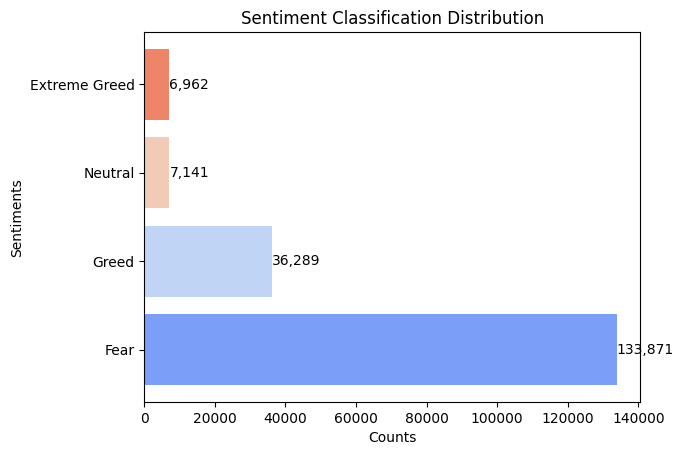

In [ ]:
# Let's Visualize for deeper Understanding

bars = plt.barh(Sentiment_counts.index, Sentiment_counts.values, color=sns.color_palette('coolwarm', len(Sentiment_counts)))
plt.title('Sentiment Classification Distribution')
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}', va='center', ha='left')
plt.ylabel('Sentiments')
plt.xlabel('Counts')
plt.show()

In [ ]:
# Let's see Avrage trade size by Classification
Avg_tsize= df.groupby(df['classification'])['Size USD'].mean().sort_values(ascending= True)
Avg_tsize

,Size USD
classification,
Neutral,3058.848110
Greed,3182.883845
Fear,5259.977837
Extreme Greed,5660.265764


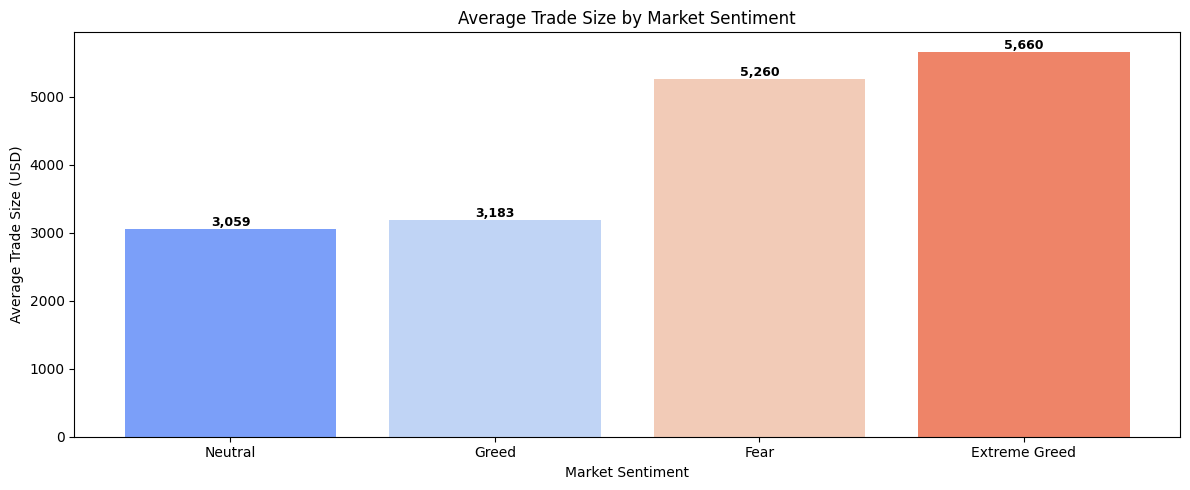

In [ ]:
# Let's Visualize for better Understanding

plt.figure(figsize=(12,5))
bars = plt.bar(Avg_tsize.index, Avg_tsize.values, color=sns.color_palette('coolwarm', len(Avg_tsize)))

plt.title('Average Trade Size by Market Sentiment')
plt.ylabel('Average Trade Size (USD)')
plt.xlabel('Market Sentiment')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f'{bar.get_height():,.0f}',
        ha='center', va='bottom', fontsize=9, fontweight='semibold'
    )

plt.tight_layout()
plt.show()


In [ ]:
# Total trading volume by sentiment
Total_tvol= df.groupby('classification')['Size USD'].sum().round()
Total_tvol

,Size USD
classification,
Extreme Greed,39406770.0
Fear,704158493.0
Greed,115503672.0
Neutral,21843234.0


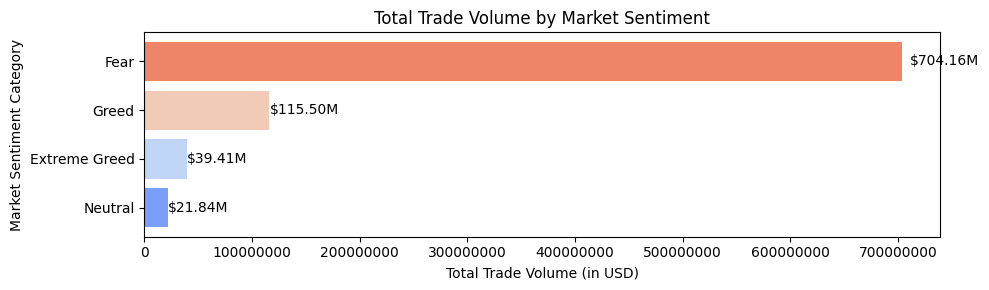

In [ ]:
# Total Trade Volume by Market Sentiment

Total_tvol = Total_tvol.sort_values(ascending=True)
plt.figure(figsize=(10,3))
bars = plt.barh(Total_tvol.index, Total_tvol.values, color=sns.color_palette("coolwarm", len(Total_tvol)))
plt.title('Total Trade Volume by Market Sentiment')
plt.xlabel('Total Trade Volume (in USD)')
plt.ylabel('Market Sentiment Category')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=0)

for bar in bars:
    plt.text(
        bar.get_width() + (bar.get_width() * 0.01),
        bar.get_y() + bar.get_height()/2,
        f"${bar.get_width()/1e6:.2f}M",
        va='center', ha='left', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()


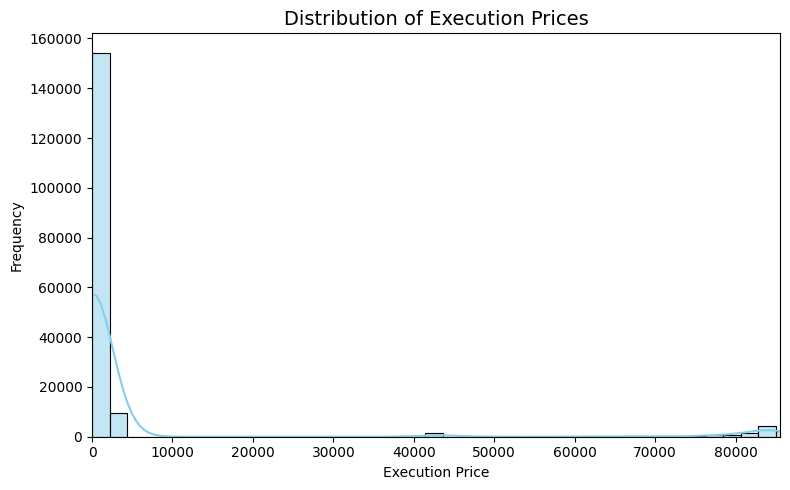

In [ ]:
# Distribution of Execution Prices

plt.figure(figsize=(8,5))
sns.histplot(df['Execution Price'], bins=50, kde=True, color='skyblue')

plt.xlim(0, df['Execution Price'].quantile(0.95))  # focus on 95% of data
plt.title('Distribution of Execution Prices', fontsize=14)
plt.xlabel('Execution Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Most trades are executed at low prices, but there are a few rare cases where execution prices are very high — these outliers make the distribution long-tailed.

This plot is heavily right-skewed, meaning:

1. Most trade prices are small (clustered around the left side).

2. A few very large prices (outliers) stretch the axis and make the rest look squished.

In [ ]:
# Handeling Outliers
Q1 = df['Execution Price'].quantile(0.25)
Q3 = df['Execution Price'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
df1 = df[(df['Execution Price'] >= (Q1 - 1.5 * IQR)) &
                 (df['Execution Price'] <= (Q3 + 1.5 * IQR))]


In [ ]:
df1.head()

,Account,Coin,Execution Price,Size USD,Side,Start Position,Closed PnL,Fee,Timestamp,Date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,0.000000,0.0,0.345404,2024-10-27 03:33:20,2024-10-27,74,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,BUY,986.524596,0.0,0.005600,2024-10-27 03:33:20,2024-10-27,74,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,BUY,1002.518996,0.0,0.050431,2024-10-27 03:33:20,2024-10-27,74,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,BUY,1146.558564,0.0,0.050043,2024-10-27 03:33:20,2024-10-27,74,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,BUY,1289.488521,0.0,0.003055,2024-10-27 03:33:20,2024-10-27,74,Greed


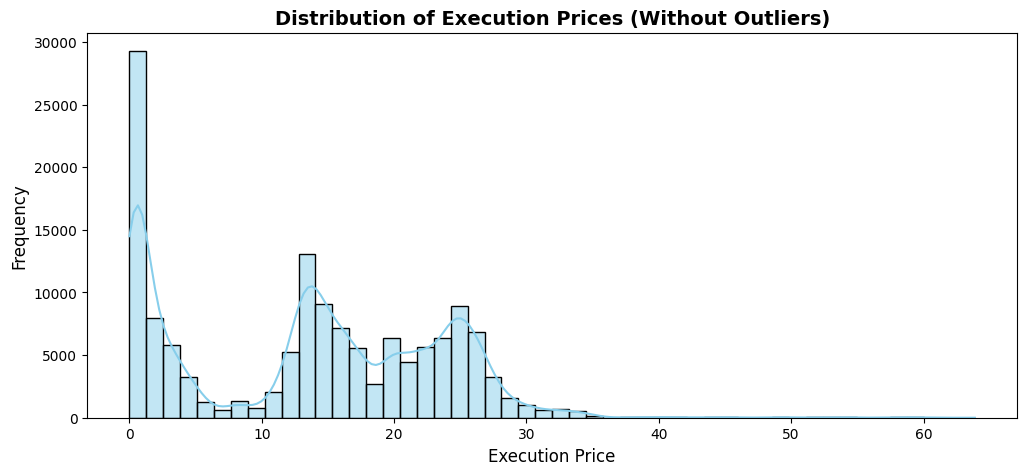

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df1['Execution Price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Execution Prices (Without Outliers)', fontsize=14, fontweight='bold')
plt.xlabel('Execution Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

This trading activity is concentrated in a specific price range — mostly low-priced assets.

The peaks indicate popular trading price zones.

The spread shows price volatility — how much variation there is between trades.

In [ ]:
top_traders= df['Account'].value_counts().head(10)
top_traders

,count
Account,
0xbee1707d6b44d4d52bfe19e41f8a828645437aab,36534
0xbaaaf6571ab7d571043ff1e313a9609a10637864,21190
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,14410
0xa0feb3725a9335f49874d7cd8eaad6be45b27416,13485
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13266
0x8477e447846c758f5a675856001ea72298fd9cb5,11216
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,8948
0x47add9a56df66b524d5e2c1993a43cde53b6ed85,8340
0x4f93fead39b70a1824f981a54d4e55b278e9f760,7479


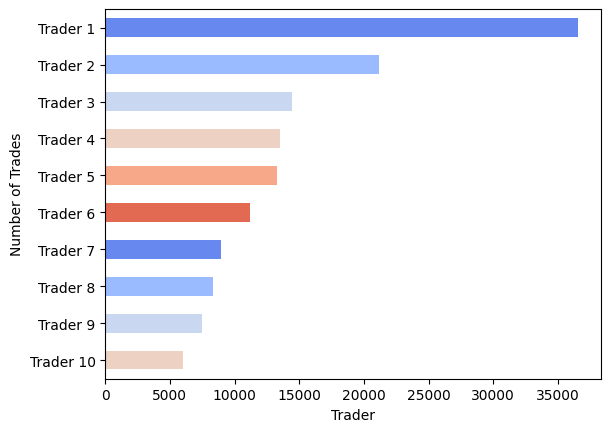

In [ ]:
top_traders= df['Account'].value_counts().head(10)
top_traders.index = [f'Trader {i+1}' for i in range(len(top_traders))]
top_traders.plot(kind='barh', color= sns.color_palette('coolwarm'))
plt.xlabel('Trader')
plt.ylabel('Number of Trades')
plt.gca().invert_yaxis()
plt.show()

In [ ]:

trade_classification = pd.crosstab(df['Account'], df['classification'])
trade_classification = trade_classification.reset_index()
trade_classification['Trader_Label'] = [f'Trader {i+1}' for i in range(len(trade_classification))]
trade_classification

classification,Account,Extreme Greed,Fear,Greed,Neutral,Trader_Label
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0,3356,462,0,Trader 1
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0,3533,320,0,Trader 2
2,0x271b280974205ca63b716753467d5a371de622ab,0,1136,5,5,Trader 3
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0,6794,6472,0,Trader 4
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0,2471,763,0,Trader 5
5,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,27,349,161,80,Trader 6
6,0x39cef799f8b69da1995852eea189df24eb5cae3c,0,3445,144,0,Trader 7
7,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,0,141,191,0,Trader 8
8,0x420ab45e0bd8863569a5efbb9c05d91f40624641,0,258,125,0,Trader 9
9,0x430f09841d65beb3f27765503d0f850b8bce7713,88,671,43,249,Trader 10


In [ ]:
cols= list(trade_classification.columns)
cols.insert(cols.index('Account')+1 , cols.pop(cols.index('Trader_Label')))
trade_classification = trade_classification[cols]
numeric_cols = trade_classification.select_dtypes(include='number').columns
trade_classification['Dominant_Sentiment'] = trade_classification[numeric_cols].idxmax(axis=1)
trade_classification

/tmp/ipython-input-2892407555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_classification['Dominant_Sentiment'] = trade_classification[numeric_cols].idxmax(axis=1)


classification,Account,Trader_Label,Extreme Greed,Fear,Greed,Neutral,Dominant_Sentiment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Trader 1,0,3356,462,0,Fear
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Trader 2,0,3533,320,0,Fear
2,0x271b280974205ca63b716753467d5a371de622ab,Trader 3,0,1136,5,5,Fear
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,Trader 4,0,6794,6472,0,Fear
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,Trader 5,0,2471,763,0,Fear
5,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,Trader 6,27,349,161,80,Fear
6,0x39cef799f8b69da1995852eea189df24eb5cae3c,Trader 7,0,3445,144,0,Fear
7,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,Trader 8,0,141,191,0,Greed
8,0x420ab45e0bd8863569a5efbb9c05d91f40624641,Trader 9,0,258,125,0,Fear
9,0x430f09841d65beb3f27765503d0f850b8bce7713,Trader 10,88,671,43,249,Fear


In [ ]:
trade_classification.describe().T

,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Greed,32.0,217.56250,756.395525,0.0,0.00,0.0,0.00,3076.0
Fear,32.0,4183.46875,5730.675437,95.0,866.75,2763.5,4849.75,26651.0
Greed,32.0,1134.03125,2159.666648,0.0,107.25,258.5,826.25,9883.0
Neutral,32.0,223.15625,749.310526,0.0,0.00,0.0,1.25,3810.0


This means that the most of the traders have **'Fear'** as their dominant sentiment, Whearas the **'Greed'** is second most dominant sentiment.



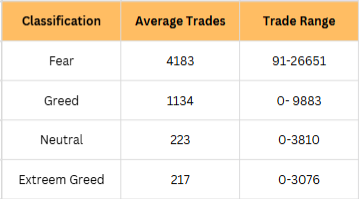


This shows the average  and range of the trades based on thier classification

# Time based Insights

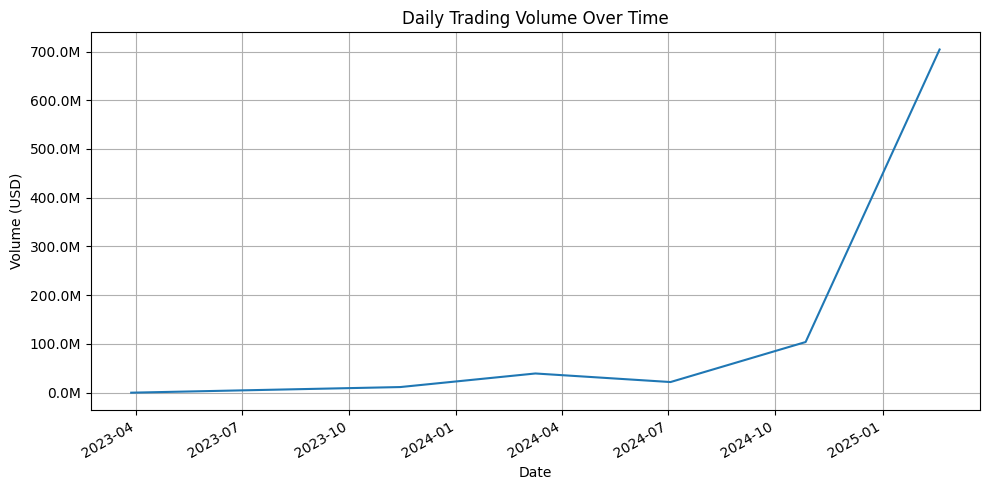

In [ ]:
import matplotlib.ticker as ticker
daily_volume = df.groupby('Date')['Size USD'].sum()

fig, ax = plt.subplots(figsize=(10, 5))
daily_volume.plot(ax=ax, title='Daily Trading Volume Over Time')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.set_xlabel('Date')
ax.set_ylabel('Volume (USD)')
ax.grid(True)

plt.tight_layout()
plt.show()


We can see the increas in the trend as the amount of the trading has been incereasd over the time.

<Axes: xlabel='Date'>

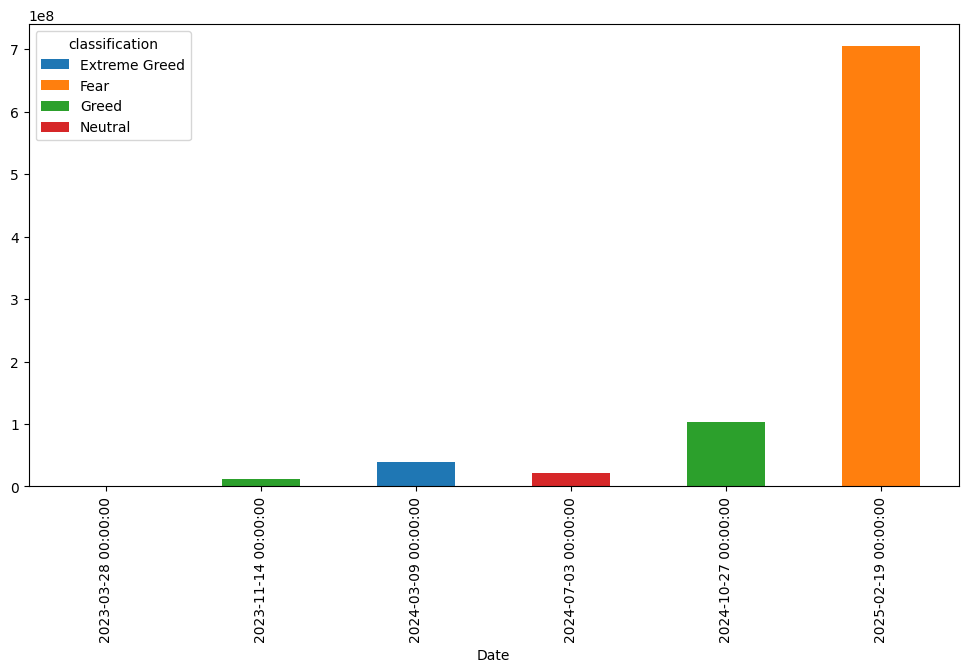

In [ ]:
df.groupby(['Date', 'classification'])['Size USD'].sum().unstack().plot(kind='bar', stacked=True, figsize=(12,6))

- X-axis (Date): Specific trading dates (e.g., 2023-10-29, 2023-12-19).
- Y-axis (Size USD): Total trading volume in USD.

1. Early period (2023): Low sentiment scores, mostly Greed at minimal levels.
2. Mid-2024 (March): Shift to Extreme Greed, still relatively moderate in scale.
3. July 2024: Brief Neutral sentiment.
4. Late 2024 (December): Greed returns and grows stronger.
5. Early 2025 (February): Dramatic spike in Fear — the highest value by far (nearly 10x previous peaks), shown in orange.



<Axes: >

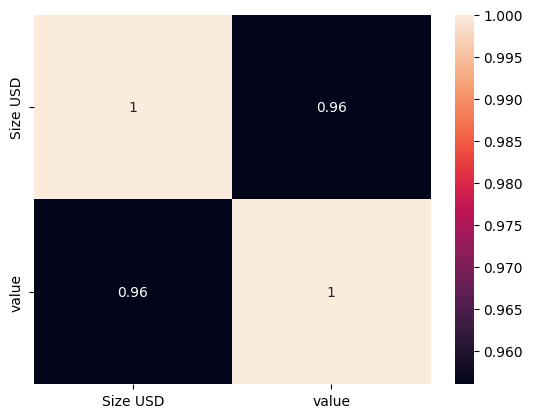

In [ ]:
sns.heatmap(df.groupby('Date')[['Size USD', 'value']].sum().corr(), annot= True)


This heatmap shows a very strong positive correlation (0.96) between the variables "Size USD" and "value", meaning they tend to increase or decrease together almost perfectly.

In [ ]:
pnl_by_sentiment = df.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)
print(pnl_by_sentiment)

classification
Greed            87.894859
Fear             50.047622
Extreme Greed    25.418772
Neutral          22.229713
Name: Closed PnL, dtype: float64


/tmp/ipython-input-1257744804.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values, palette='coolwarm')


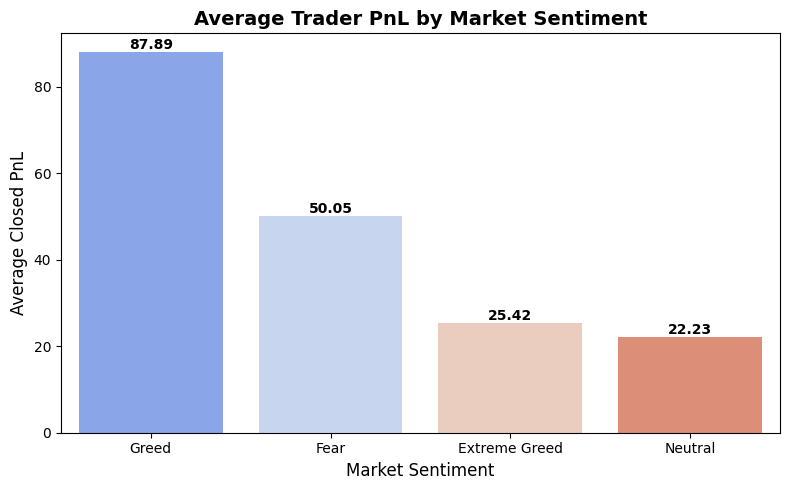

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values, palette='coolwarm')

plt.title('Average Trader PnL by Market Sentiment', fontsize=14, fontweight='bold')
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Average Closed PnL', fontsize=12)

# Annotate values
for i, val in enumerate(pnl_by_sentiment.values):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=10, fontweight='semibold')

plt.tight_layout()
plt.show()

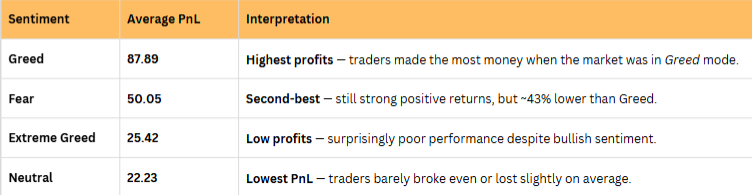

In [ ]:
buy_sell_pnl = df.groupby(['classification', 'Side'])['Closed PnL'].mean().reset_index()
buy_sell_pnl

,classification,Side,Closed PnL
0,Extreme Greed,BUY,25.578564
1,Extreme Greed,SELL,25.268770
2,Fear,BUY,58.074630
3,Fear,SELL,42.222976
4,Greed,BUY,12.489506
5,Greed,SELL,143.617782
6,Neutral,BUY,15.646108
7,Neutral,SELL,28.576120


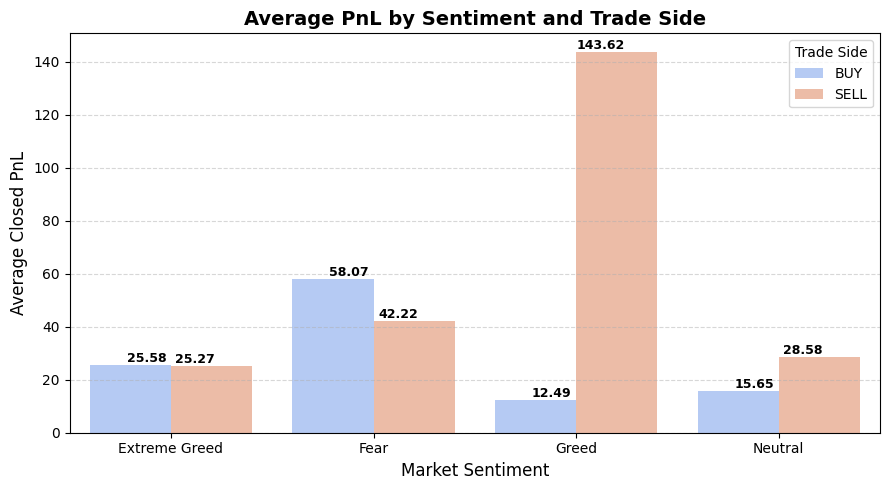

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
sns.barplot(
    data=buy_sell_pnl,
    x='classification',
    y='Closed PnL',
    hue='Side',
    palette='coolwarm'
)

plt.title('Average PnL by Sentiment and Trade Side', fontsize=14, fontweight='bold')
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Average Closed PnL', fontsize=12)
plt.legend(title='Trade Side', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bars with values
for i in range(len(buy_sell_pnl)):
    plt.text(
        i // 2 + (0.12 if buy_sell_pnl.loc[i, 'Side']=="SELL" else -0.12),
        buy_sell_pnl.loc[i, 'Closed PnL'],
        f"{buy_sell_pnl.loc[i, 'Closed PnL']:.2f}",
        ha='center', va='bottom', fontsize=9, fontweight='semibold'
    )

plt.tight_layout()
plt.show()


1. **Greed = Short Seller’s Paradise**

SELL PnL = 143.62 → Highest in the entire dataset

BUY PnL = 12.49 → Lowest of all BUYs

→ Greed may signal overbought tops, perfect for shorts.


2. **Fear = Long Trader’s Sweet Spot**

BUY PnL = 58.07 → 2nd highest overall

SELL PnL = 42.22 → Still good, but lags


Conclusion: Fear is a dip-buying opportunity — contrarian longs crush it.

3. **Extreme Greed = Balanced Mediocrity**

Both sides ~25 PnL → nearly identical


No edge. Market likely topping out with low volatility or fakeouts.


4. **Neutral = Mild Short Bias**

SELL > BUY (28.58 vs 15.65)


Choppy market → shorts grind small edges; longs get chopped.0

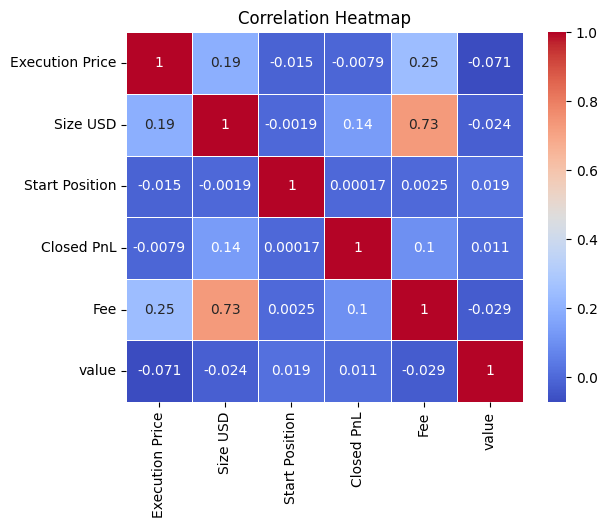

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



After seeing this heatmap following conclusions can be deduced.

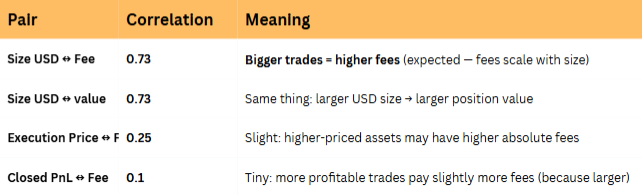

### **Final Insights & Strategy Recommendations**

- During **Fear** phases:
  → Long positions outperform short positions.
  → Strategy: Accumulate / buy dips during high fear.

- During **Greed** phases:
  → Short selling tends to outperform.
  → Strategy: Take profit or tighten stop losses when greed is high.

- During **Neutral** phases:
  → Market is choppy with no clear direction.
  → Strategy: Avoid high leverage and reduce position size.

- Extreme Greed:
  → Both sides flatten out → possible market exhaustion.
  → Strategy: Wait for reversal signals.


| Sentiment     | Average PnL | Interpretation                                                                 |
|---------------|-------------|--------------------------------------------------------------------------------|
| Greed         | 87.89       | **Highest profits** — traders made the most money when the market was in Greed mode. |
| Fear          | 50.05       | **Second-best** — still strong positive returns, but ~43% lower than Greed.     |
| Extreme Greed | 25.42       | **Low profits** — surprisingly poor performance despite bullish sentiment.     |
| Neutral       | 22.23       | **Lowest PnL** — traders barely broke even or lost slightly on average.        |